In [1]:
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("KDDTrain+.csv", sep = ",")

In [4]:
protocol_type = {'tcp': 1,'udp': 2,'icmp':3} 
flag = { 'OTH':1,'REJ':2,'RSTO':3,'RSTOS0':4,'RSTR':5,'S0':6,'S1':7,'S2':8,'S3':9,'SF':10,'SH':11}
service = {'aol':1,'auth':2,'bgp':3,'courier':4,'csnet_ns':5,'ctf':6,'daytime':7,'discard':8,'domain':9,'domain_u':10,'echo':11,'eco_i':12,'ecr_i':13,'efs':14,'exec':15,'finger':16,'ftp':17,'ftp_data':18,'gopher':19,'harvest':20,'hostnames':21,'http':22,'http_2784':23,'http_443':24,'http_8001':25,'imap4':26,'IRC':27,'iso_tsap':28,'klogin':29,'kshell':30,'ldap':31,'link':32,'login':33,'mtp':34,'name':35,'netbios_dgm':36,'netbios_ns':37,'netbios_ssn':38,'netstat':39,'nnsp':40,'nntp':41,'ntp_u':42,'other':43,'pm_dump':44,'pop_2':45,'pop_3':46,'printer':47,'private':48,'red_i':49,'remote_job':50,'rje':51,'shell':52,'smtp':53,'sql_net':54,'ssh':55,'sunrpc':56,'supdup':57,'systat':58,'telnet':59,'tftp_u':60,'tim_i':61,'time':62,'urh_i':63,'urp_i':64,'uucp':65,'uucp_path':66,'vmnet':67,'whois':68,'X11':69,'Z39_50':70}


In [5]:
# traversing through dataframe 
# protocol_type,flag, service column and writing 
# values where key matches 
dataset.protocol_type = [protocol_type[item] for item in dataset.protocol_type] 
dataset.flag = [flag[item] for item in dataset.flag] 
dataset.service = [service[item] for item in dataset.service] 
print(dataset) 

        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              1       18    10        491          0     0   
1              0              2       43    10        146          0     0   
2              0              1       48     6          0          0     0   
3              0              1       22    10        232       8153     0   
4              0              1       22    10        199        420     0   
5              0              1       48     2          0          0     0   
6              0              1       48     6          0          0     0   
7              0              1       48     6          0          0     0   
8              0              1       50     6          0          0     0   
9              0              1       48     6          0          0     0   
10             0              1       48     2          0          0     0   
11             0              1       48     6          0       

In [6]:
dataset.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,18,10,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,43,10,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,48,6,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,10,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,10,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
#splitting dataset into features and class
X = dataset.iloc[:, 0:41].values  
y = dataset.iloc[:, 41].values  


#splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [8]:
#training the algorithm
# Create the RandomForest model
classifier1 = RandomForestClassifier(n_estimators=200, bootstrap = True, max_features = 'sqrt')

In [10]:
# Fit on training data
# training RandomForest
clf1 = classifier1.fit(X_train, y_train)

#prediction
#for RandomForest
pred1 = clf1.predict(X_test)

In [12]:
#confusion matrix.
#for RandomForest
cm1=confusion_matrix(y_test,pred1)
cm1

array([[11767,    24],
       [    9, 13395]], dtype=int64)

In [13]:
#accuracy matrix
#for RandomForest
ac1=100*accuracy_score(y_test,pred1)
ac1

99.86902163127604

In [14]:
#creating the Decision Tree model
classifier2 = DecisionTreeClassifier(criterion = "entropy", max_depth=10)

In [15]:
#training decision tree
clf2 = classifier2.fit(X_train, y_train)

In [16]:
#for decision tree
pred2 = clf2.predict(X_test)

In [17]:
#for decision tree
cm2=confusion_matrix(y_test,pred2)
cm2

array([[11759,    32],
       [   31, 13373]], dtype=int64)

In [18]:
#for decision tree
ac2=100*accuracy_score(y_test,pred2)
ac2

99.74995038698154

In [20]:
#creating the Naive Bayes
classifier3 = GaussianNB(priors=None, var_smoothing=1e-09)

#training Naive Bayes
clf3 = classifier3.fit(X_train, y_train)

#for Naive Bayes
pred3 = clf3.predict(X_test)

#for Naive Bayes
cm3=confusion_matrix(y_test,pred3)
cm3

array([[  214, 11577],
       [  227, 13177]], dtype=int64)

In [21]:
#for Naive Bayes
ac3=100*accuracy_score(y_test,pred3)
ac3

53.1494344115896

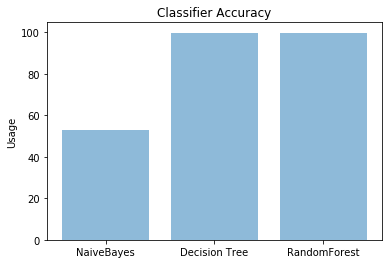

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import pydot


objects = ('NaiveBayes','Decision Tree', 'RandomForest',)
y_pos = np.arange(len(objects))
performance = [ac3,ac2,ac1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Classifier Accuracy')
 

plt.show()